<a href="https://colab.research.google.com/github/ErickPol0/PortfolioProject/blob/main/ANALISIS_DE_REGRESION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de regresión lineal
Erick Polo - 190300372\
Ingenieria en datos e inteligencia organizacional

# Data import

In [ ]:
#Importacion de los datos
data <- read.csv('consumo_cerveja_SaoPaulo.csv')
str(data)

'data.frame':	365 obs. of  2 variables:
 $ TemperaturaMaxima: num  32.5 33.5 29.9 28.6 28.3 30.5 33.7 32.8 34 34.2 ...
 $ Consumodecerveja : num  25.5 29 30.8 29.8 28.9 ...


Los datos contienen observaciones de la temperatura registrada en un dia a la vez que la cantidad de consumo de cerveja, queremos saber si podemos predecir cual sera el consumo dependiendo de la temperatura.



# EDA

In [ ]:
#Vista breve los valores
head(data)

TemperaturaMaxima,Consumodecerveja
32.5,25.461
33.5,28.972
29.9,30.814
28.6,29.799
28.3,28.900
30.5,28.218


In [ ]:
#Exploracion de medidad estadisticas y de asociacion 

library(dplyr)
info <- data %>% summarize(
    N = n(), 
    MediaTemp = mean(TemperaturaMaxima), 
    std_temp = sd(TemperaturaMaxima), 
    MediaConsumo = mean(Consumodecerveja), 
    std_consumo = sd(Consumodecerveja), 
    Correlacion_x_y = cor(TemperaturaMaxima, Consumodecerveja),
    a1 = round((cov(TemperaturaMaxima,Consumodecerveja)/var(TemperaturaMaxima)),4),
    a0 = round((MediaConsumo - a1*MediaTemp), 4),
  )
info

N,MediaTemp,std_temp,MediaConsumo,std_consumo,Correlacion_x_y,a1,a0
365,26.61151,4.317366,25.40137,4.399143,0.6426725,0.6548,7.9762


No parece ver nada raro en los datos, la correlación parece ser fuerte, lo cual nos dice que muy posiblemente sera posible mmodelar esta relacion

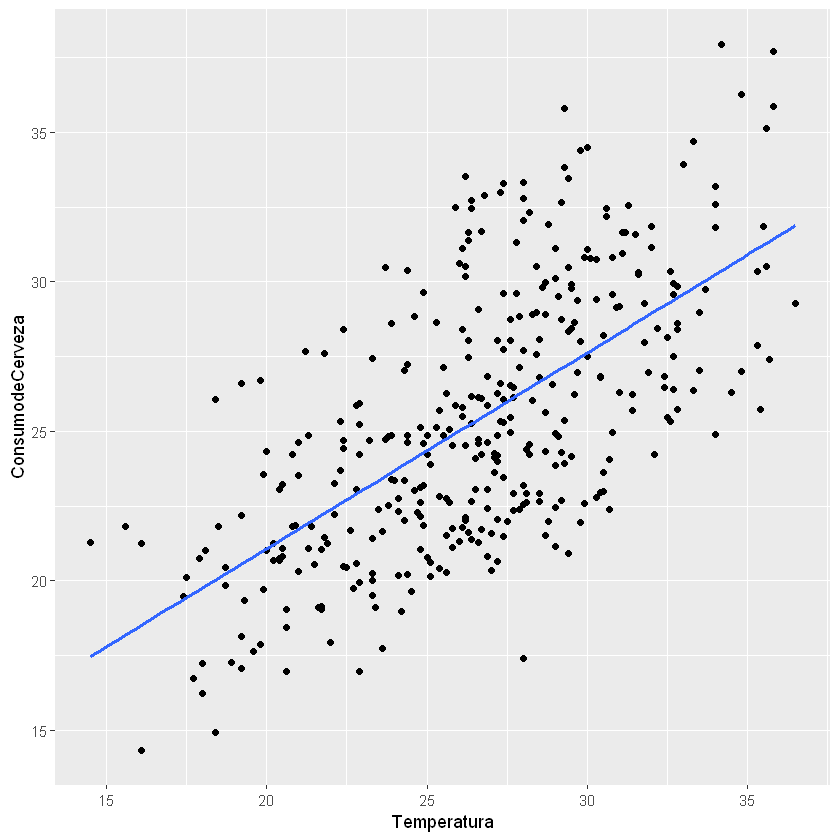

In [ ]:
library(ggplot2)
ggplot(data, aes(x = TemperaturaMaxima, y = Consumodecerveja)) +
  geom_point() +
    geom_smooth(method = 'lm', se = FALSE) + 
  labs(x = "Temperatura", y = "ConsumodeCerveza")

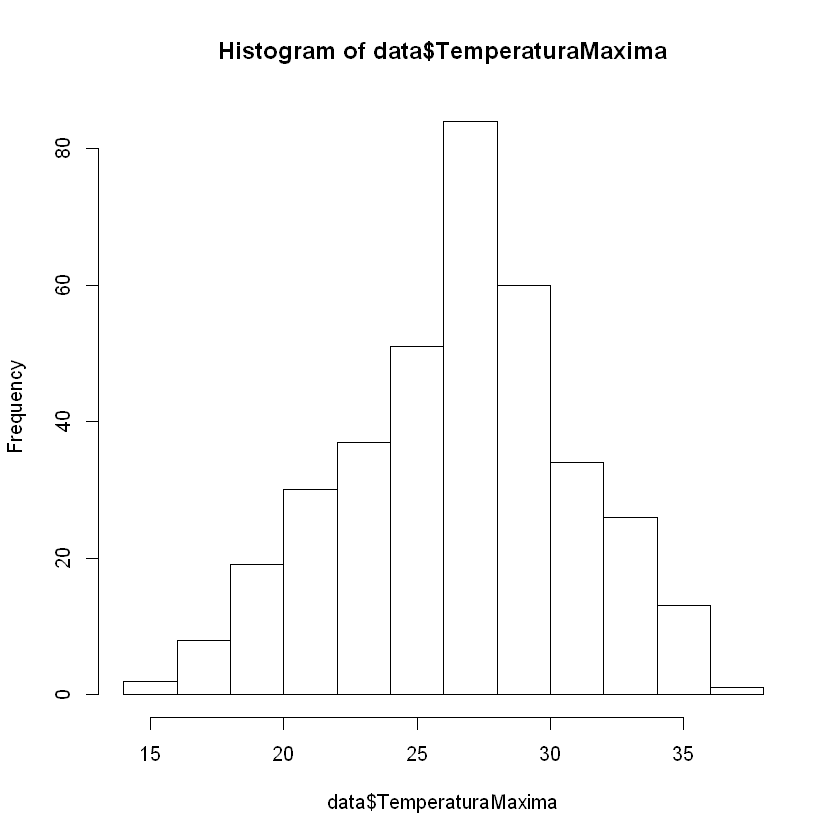

In [ ]:
hist(data$TemperaturaMaxima)

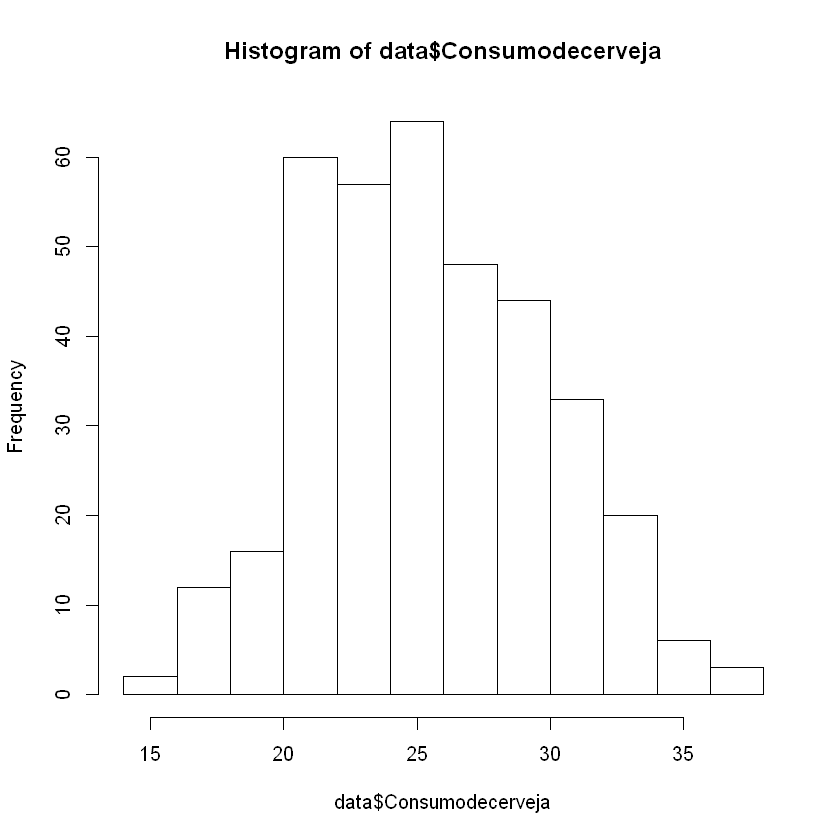

In [ ]:
hist(data$Consumodecerveja)

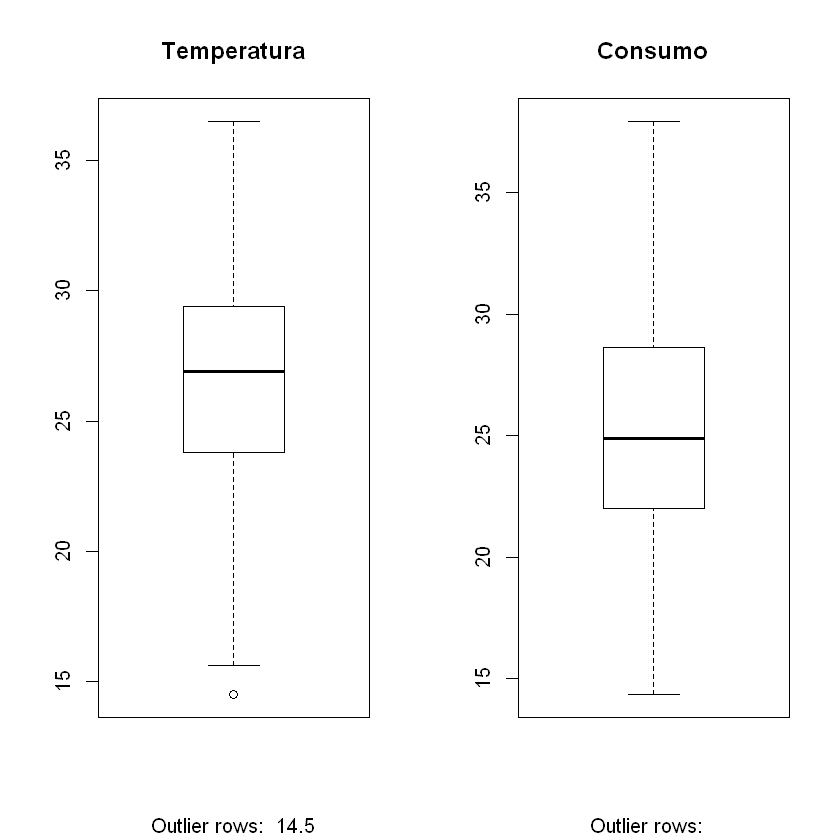

In [ ]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns
boxplot(data$TemperaturaMaxima, main="Temperatura", sub=paste("Outlier rows: ", boxplot.stats(data$TemperaturaMaxima)$out))  # box plot for x
boxplot(data$Consumodecerveja, main="Consumo", sub=paste("Outlier rows: ", boxplot.stats(data$Consumodecerveja)$out))  # box plot for y

$$Resultados \ vistos$$\
Segun la grafica y los datos obtenidos, se puede observar que existe una relacion entre la temperatura maxima y el consumo de cerveja de manera que con lo que tenemos podemos inferir que entre mas temperatura haga, mayor es el consumos de cerveja.

Linea de regresion:
$$\hat{y} = 0.6548x + 7.9762 $$

# train_test sample

train <- 80%

test <- 20%

In [ ]:
n <- nrow(data)
ind <- 1:n
train_sample <- sample(ind, 0.8*n)
test_sample <- ind[-train_sample]

train <- data[train_sample,]
test <- data[test_sample,]

# Modelamos

In [ ]:
#creamos el modelo y revisamos su contenido

r0 <- lm(Consumodecerveja~TemperaturaMaxima , data = train)
summary(r0)


Call:
lm(formula = Consumodecerveja ~ TemperaturaMaxima, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8825 -2.7714 -0.4628  2.4153  8.4701 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.07592    1.28043   5.526 7.29e-08 ***
TemperaturaMaxima  0.68591    0.04756  14.422  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.39 on 290 degrees of freedom
Multiple R-squared:  0.4177,	Adjusted R-squared:  0.4157 
F-statistic:   208 on 1 and 290 DF,  p-value: < 2.2e-16


# Verificación

Verifiquemos que nuestro modelo es valido, debemos checar que los residuos siguen una distibucion normal, con media 0 y con una varianza constante. Para ello podemos graficar estos residos y comprobarlo.

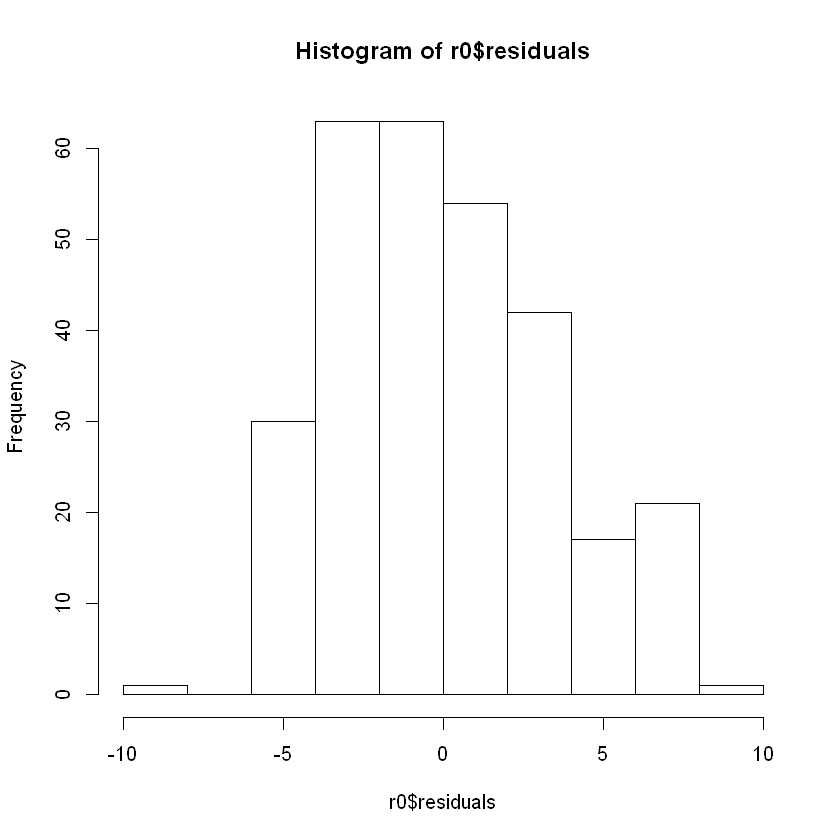

In [ ]:
hist(r0$residuals)

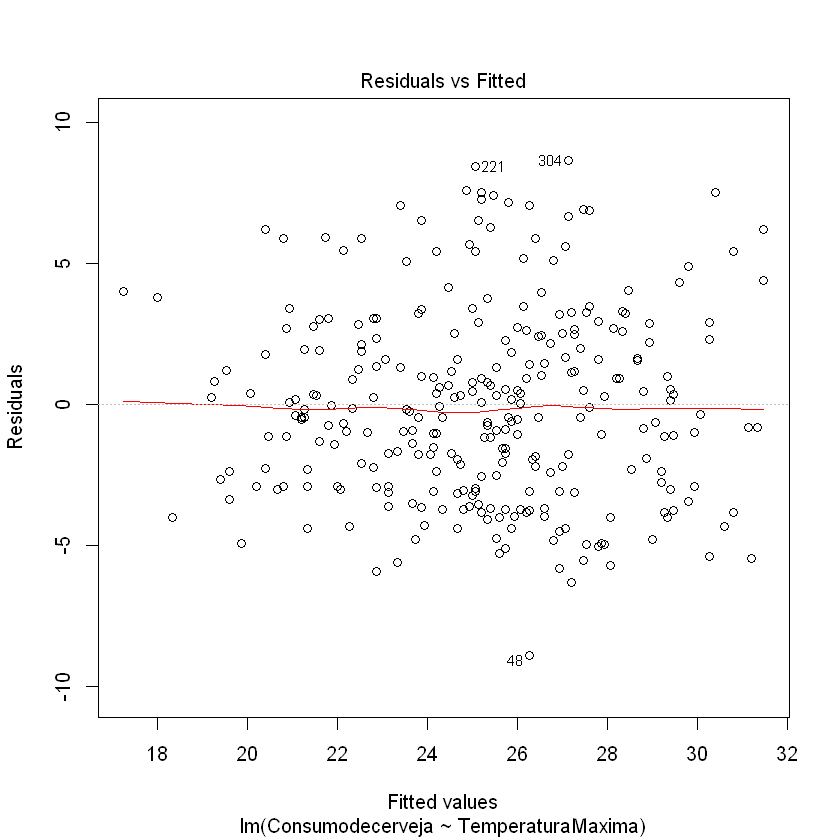

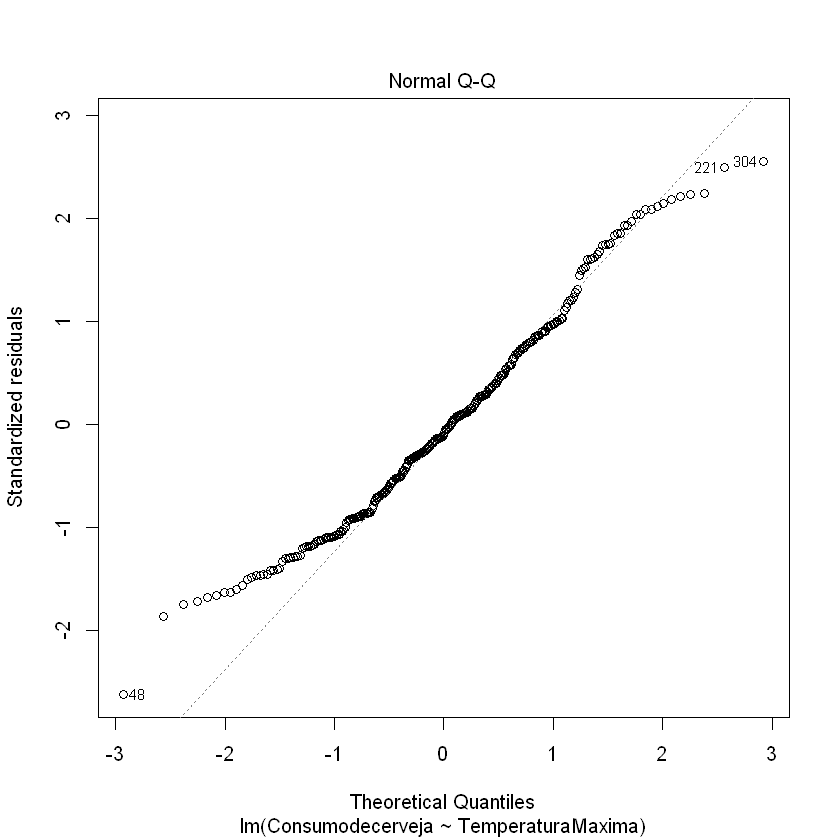

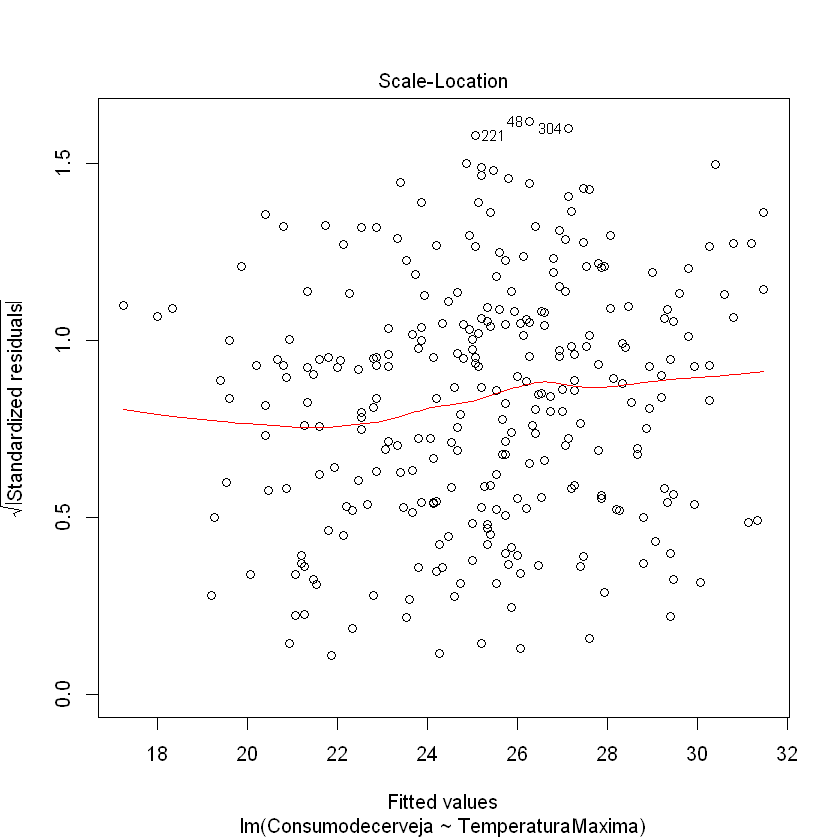

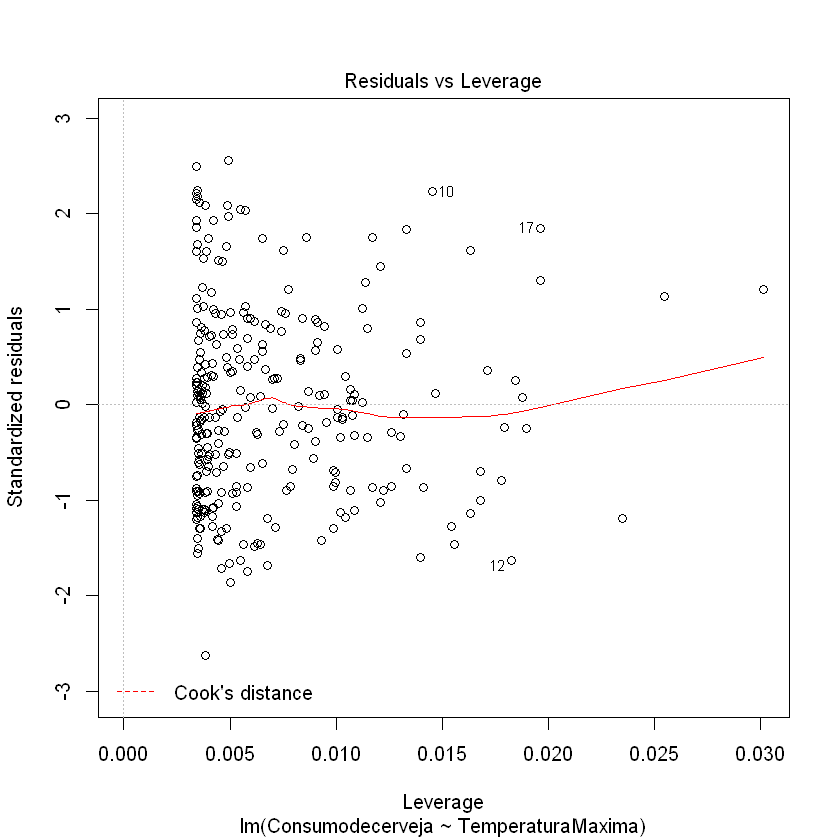

In [ ]:
plot(r0)

Parece que nuestro modelo es pasable, el histograma de residuos parece ser normal, la grafica de dispersion es muy bueno no se ve que haya una estructura y la media parece estar sobre 0, el Q-Q plot muestra que la distribucion es normal con sesgos en ambas colas. Concluimos que nuestro modelo es valido.

# Predicciones

In [ ]:
#Consumodecerveja~TemperaturaMaxima  
ggplot() +
  geom_point(train, aes(x = TemperaturaMaxima, y = TemperaturaMaxima), colour = 'red') +
  geom_line(aes(x = train$TemperaturaMaxima, y = predict(r0, newdata = train)),colour = 'blue') +
  ggtitle('Consumo vs Temperatura (Train Set)') +
  xlab('Temperatura') +
  ylab('Consumo')

ggplot(data, aes(x = TemperaturaMaxima, y = Consumodecerveja)) +
  geom_point() +
    geom_smooth(method = 'lm', se = FALSE) + 
  labs(x = "Temperatura", y = "ConsumodeCerveza")

ERROR: Error: `mapping` must be created by `aes()`


In [ ]:
py <- predict(r0,test)

In [ ]:
n_test <- nrow(test)
mse <- sum((test$Consumodecerveja - py))^2/n_test
mse

[1] 9.518302

In [ ]:
#promedio del valor absoluto del error.
install.packages("Metrics")
library(Metrics)
round(mae(data$Consumodecerveja, predict(modelo)),2)

Warning message:
"package 'Metrics' is in use and will not be installed"

[1] 2.76

El coeficiente de determinacion es de 0.413 lo que quiere decir que se explica el 40% de la varianza con el modelo lineal lo cual no es bueno, el otro 60% no se explica, un promedio del error absoluto de 2.76 lo que quiere decir que el modelo tiene buen ajuste. 
Finalmente como conclusion e interpretacion de la linea regresional,
$$\hat{y} = 0.6548x + 7.9762 $$
por cada grado centígrado que la temperatura (x) aumente, se espera que el consumo de cerveja en miles de litros aumente 0.6548. 